<a href="https://colab.research.google.com/github/dishant26/layout-with-ocr/blob/main/Tutorials/Tutorial_OCR%2BLayout_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Clone the Layout-with-OCR Repository

In [1]:
!git clone https://github.com/dishant26/layout-with-ocr.git

Cloning into 'layout-with-ocr'...
remote: Enumerating objects: 291, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 291 (delta 11), reused 2 (delta 2), pack-reused 265
Receiving objects: 100% (291/291), 45.42 MiB | 13.17 MiB/s, done.
Resolving deltas: 100% (138/138), done.


In [2]:
cd "layout-with-ocr/"

/content/layout-with-ocr


## Installing the Packages
#### Restart Runtime after installing all the packages.

In [3]:
!sh packages.txt

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-uny8zs2g
  Running command git clone -q https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-uny8zs2g
     |████████████████████████████████| 50 kB 7.1 MB/s 
     |████████████████████████████████| 74 kB 3.9 MB/s 
     |████████████████████████████████| 147 kB 75.9 MB/s 
     |████████████████████████████████| 130 kB 73.5 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
     |████████████████████████████████| 749 kB 60.2 MB/s 
     |████████████████████████████████| 843 kB 60.7 MB/s 
     |████████████████████████████████| 596 kB 11.2 MB/s 
     |████████████████████████████████| 112 kB 77.7 MB/s 
  Created wheel for detectron2: filename=detectron2-0.6-cp37-cp37m-linux_x86_64.whl size=5720838 sha256=76743a97bf45279316389b9ab19739b802f9824b2be062aec43877859446e0b7
  Stored in directory: /tmp/pip-ephem-wheel-cache-kmkljh6y/wheels/07/dc/32/0322cb484dbefab8b9366bfedbaff5060ac7

## For Document Layout Detection + OCR of the Image/PDF


*   #### Enter **"Yes"** when asked **Do you wish to use Layout Inference?**
*   #### Select the Language Model to be applied on the image.
*   #### Enter the name of the output directory.
*   #### Select the Layout Detection Model to be applied on the image. The model weights will be fetched from the config file.
*   #### Choose whether you want to use a random image or upload an image.
*   #### Select the Confidence Threshold between 0 and 1.


---


###   Output Files will be generated in the entered output directory

*   #### **image_with_predictions.jpg** - Image with the bbox and labels.
*   #### **output-ocr.txt** - OCRed Text from the image.
*   #### **hocr_data.json** - OCRed Text with bbox and confidence values.
*   #### **layout_data.json** - Detection Label with bbox and confidence values.
*   #### **layout.hocr** - HOCR file with detected text with bbox and confidence value.




In [3]:
!python lp_ocr.py

Do you wish to use Layout Inference? (yes or no)yes
1. san_iitb
2. san
3. eng
Choose the language model for OCR from the above list: 1
Selected language model: san_iitb
Directory for OCR output: 
output
config_list is  ['Sanskrit_PubLayNet_faster_rcnn', 'Sanskrit_PubLayNet_mask_rcnn_X101', 'Sanskrit_COCO_faster_rcnn', 'Sanskrit_COCO_mask_rcnn', 'PubLayNet_faster_rcnn', 'PubLayNet_mask_rcnn_R50', 'PubLayNet_mask_rcnn_X101']
1 : Sanskrit_PubLayNet_faster_rcnn
2 : Sanskrit_PubLayNet_mask_rcnn_X101
3 : Sanskrit_COCO_faster_rcnn
4 : Sanskrit_COCO_mask_rcnn
5 : PubLayNet_faster_rcnn
6 : PubLayNet_mask_rcnn_R50
7 : PubLayNet_mask_rcnn_X101
 
choose the model for the inference : 1
Selected Model =  Sanskrit_PubLayNet_faster_rcnn
 
True
model weights fetched : https://www.dropbox.com/s/qb1d4edsh9oa50c/model_faster_publayout_comb.pth?dl=1
Choose a random image (yes/no) : yes
Selected image =  test_img/GK2_page-0283.jpg
 
Set the confidence threshold, choose from 0 to 1 (eg: 0.7) : 0.8
 
ROI Head

# Visualize the Results
*   #### Enter the path of the Output directory

Enter the path of the Output Folder: 
/content/layout-with-ocr/output


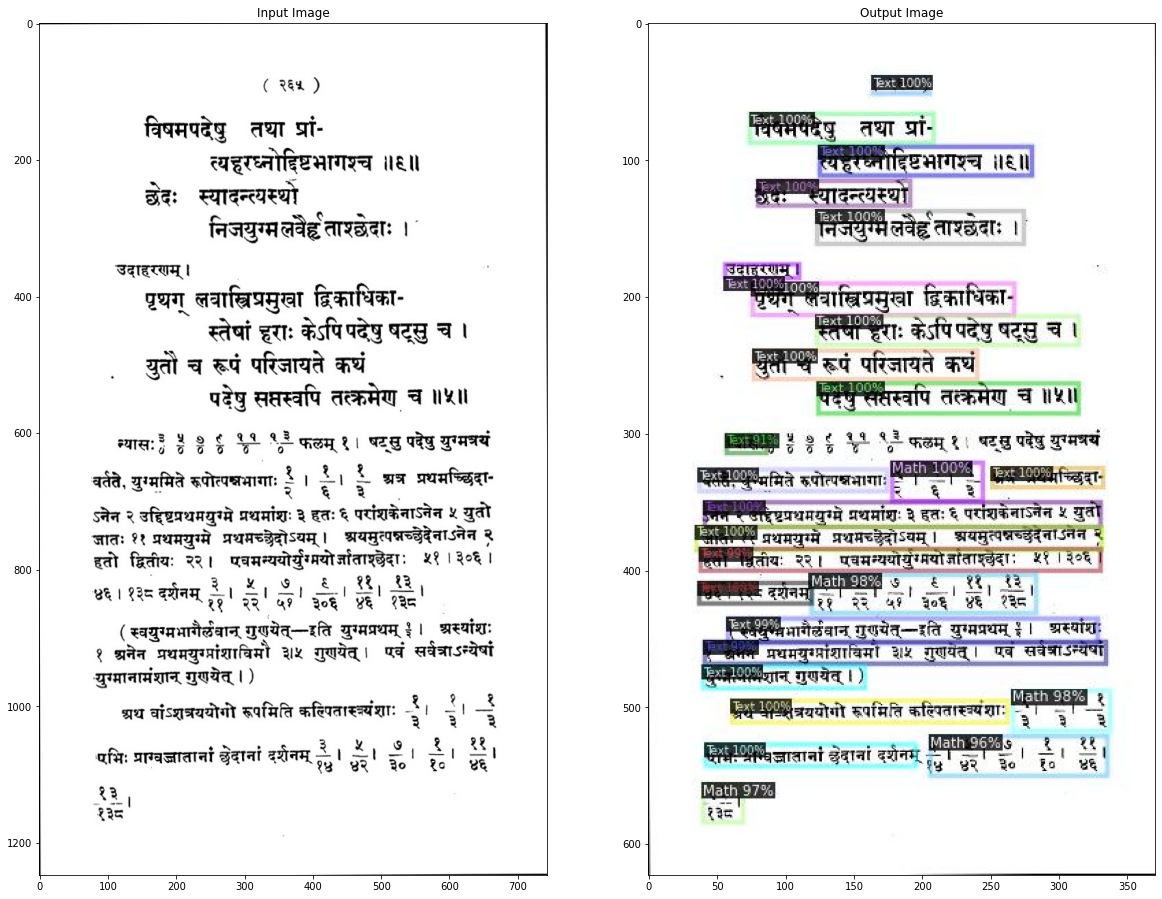

In [10]:
import cv2
import os
import matplotlib.pyplot as plt

output_dir = input("Enter the path of the Output Folder: \n")

for file in os.listdir(output_dir):
    if file.endswith(".jpg"):
        if file.startswith("image_with_predictions"):
          output_img = cv2.imread(os.path.join(output_dir, file))
        else:
          input_img = cv2.imread(os.path.join(output_dir, file))

fig, axs = plt.subplots(1, 2, figsize=(20, 20))

axs[0].imshow(input_img)
axs[0].set_title("Input Image")
axs[1].imshow(output_img)
axs[1].set_title("Output Image")
plt.show()